# 1. Importer les packages

In [166]:
# 1. Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# 2. Charger les donnees

In [167]:
# 2. Charger les donnees
data = pd.read_csv('Data/Real-state.csv')
data.head(4)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


# 3. Analyses des donnees

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [169]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [170]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

<Axes: >

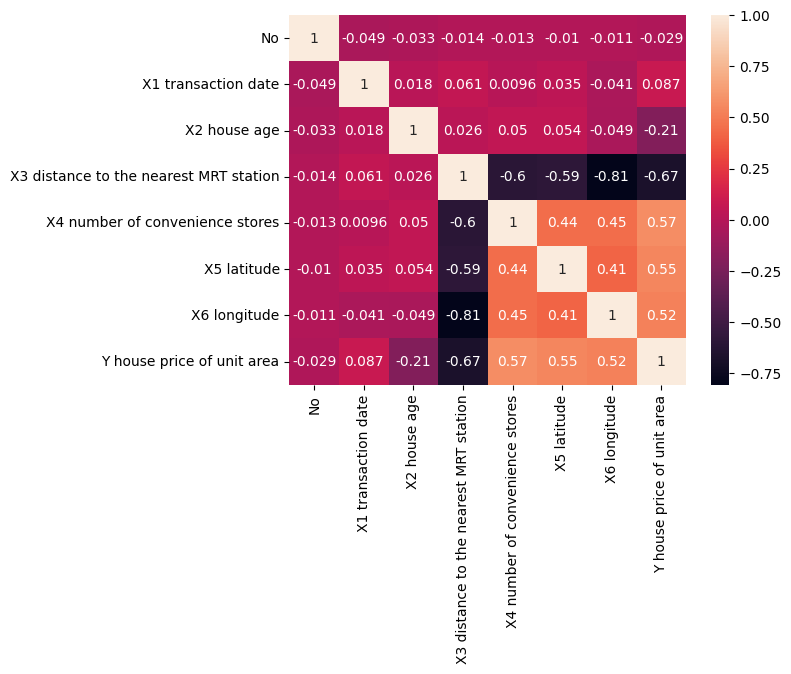

In [171]:
# Affichage de la Matrice de correlation
sns.heatmap(data.corr(), annot=True)

In [172]:
data['X4 number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0])

In [173]:
data['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64

# 4. Division des donnees

### Variables Indep et Dep

In [174]:
# 4. Division des donnees : Variables Indep et Dep
data.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [175]:
#pd.set_option('display.max_rows', None)

In [176]:
data.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [177]:
X = data.drop(columns='Y house price of unit area', axis=1)
y = data['Y house price of unit area']

In [178]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [179]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [180]:
# pd.set_option('display.max_columns', None)

In [181]:
# Separation des donnees : Train et Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=0)

In [182]:
data.shape

(414, 8)

In [183]:
print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)

X-train: (331, 7)
X-test: (83, 7)
y-train: (331,)
y-test: (83,)


# 5. Construction des Modeles

## 5.1 Linear Regression : Regression Lineaire

In [184]:
# Creation du Modele
model_lr = LinearRegression()
# Entrainement du modele
model_lr.fit(X_train, y_train)
# Faire des Predictions
model_lr.predict(X_test)
# Evaluation du modele
print("MSE du LR:", mean_squared_error(y_test, model_lr.predict(X_test)))
print("R2 Score du LR:", r2_score(y_test, model_lr.predict(X_test)))
# Si train_size= 0.8 alors R2 = 0.6557

MSE du LR: 59.798205509733236
R2 Score du LR: 0.655736641764521


## 5.2 Random Forest

In [185]:
# # Creation du Modele
model_rf = RandomForestRegressor()
# Entrainement du modele
model_rf.fit(X_train, y_train)
# Faire des Predictions
model_rf.predict(X_test)
# Evaluation du modele
print("MSE du RF:", mean_squared_error(y_test, model_rf.predict(X_test)))
print("R2 Score du RF:", r2_score(y_test, model_rf.predict(X_test)))

MSE du RF: 51.411653481927715
R2 Score du RF: 0.7040187355246581


## 5.3 Decision Tree

In [186]:
# # Creation du Modele
model_dt = DecisionTreeRegressor()
# Entrainement du modele
model_dt.fit(X_train, y_train)
# Faire des Predictions
model_dt.predict(X_test)
# Evaluation du modele
print("MSE du RF:", mean_squared_error(y_test, model_dt.predict(X_test)))
print("R2 Score du RF:", r2_score(y_test, model_dt.predict(X_test)))

MSE du RF: 94.4544578313253
R2 Score du RF: 0.4562176477347514


# 6. Faire des Predictions Simple

In [187]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [188]:
model_rf.predict([[1, 2012.917,	32.0,	84.87882,	10,	24.98298,	121.54024]])

C:\Users\MWAMBA\anaconda3\envs\bac3_GL_IA_2_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([41.562])

In [189]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
prediction_simple = model_rf.predict([
    [1, 2012.917,	32.0,	84.87882,	10,	24.98298,	121.54024]
])

In [194]:
print(prediction_simple)

[41.562]
